In [51]:
import os

import pandas as pd
import torchvision

from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.notebook import tqdm

import torch
from torch import nn, optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

from torchvision import transforms, utils, datasets

sns.set(font_scale=1.4, style="whitegrid")


from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
import matplotlib.pyplot as plt


In [67]:
n_epochs = 5
batch_size_train = 64
batch_size_test = 500
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

In [53]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

In [62]:
next(train_loader)

TypeError: 'DataLoader' object is not an iterator

In [46]:
torch.stack([a, b],dim=0).shape

In [75]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)
example_data[0][0].size()

torch.Size([28, 28])

In [38]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)
    

In [39]:
network = Net()
optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                      momentum=momentum)

In [40]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

In [41]:
def train(epoch):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = network(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            train_losses.append(loss.item())
            train_counter.append(
                (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
#             torch.save(network.state_dict(), '/results/model.pth')
#             torch.save(optimizer.state_dict(), '/results/optimizer.pth')

In [42]:
def test():
    network.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = network(data)
            test_loss += F.nll_loss(output, target, size_average=False).item()
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).sum()
    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)
    print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

AttributeError: 'list' object has no attribute 'size'

In [43]:
test()
for epoch in range(1, n_epochs + 1):
    train(epoch)
    test()

<ipython-input-38-a098dff32731>:22: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)



Test set: Avg. loss: 2.3089, Accuracy: 674/10000 (7%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.342404
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.279043
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.298765
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.277650
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.249324
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.220917
Train Epoch: 1 [7680/60000 (13%)]	Loss: 2.220687
Train Epoch: 1 [8960/60000 (15%)]	Loss: 2.191224
Train Epoch: 1 [10240/60000 (17%)]	Loss: 2.168834
Train Epoch: 1 [11520/60000 (19%)]	Loss: 2.126606
Train Epoch: 1 [12800/60000 (21%)]	Loss: 2.045601
Train Epoch: 1 [14080/60000 (23%)]	Loss: 1.884804
Train Epoch: 1 [15360/60000 (26%)]	Loss: 1.881673
Train Epoch: 1 [16640/60000 (28%)]	Loss: 1.592906
Train Epoch: 1 [17920/60000 (30%)]	Loss: 1.558182
Train Epoch: 1 [19200/60000 (32%)]	Loss: 1.492340
Train Epoch: 1 [20480/60000 (34%)]	Loss: 1.404370
Train Epoch: 1 [21760/60000 (36%)]	Loss: 1.333422
Train Epoch: 1 [23040/60000 (38%)]	Loss: 1.249338
Train Epoc

Train Epoch: 4 [25600/60000 (43%)]	Loss: 0.457073
Train Epoch: 4 [26880/60000 (45%)]	Loss: 0.310122
Train Epoch: 4 [28160/60000 (47%)]	Loss: 0.300980
Train Epoch: 4 [29440/60000 (49%)]	Loss: 0.237695
Train Epoch: 4 [30720/60000 (51%)]	Loss: 0.388767
Train Epoch: 4 [32000/60000 (53%)]	Loss: 0.445845
Train Epoch: 4 [33280/60000 (55%)]	Loss: 0.371798
Train Epoch: 4 [34560/60000 (58%)]	Loss: 0.174642
Train Epoch: 4 [35840/60000 (60%)]	Loss: 0.337979
Train Epoch: 4 [37120/60000 (62%)]	Loss: 0.358524
Train Epoch: 4 [38400/60000 (64%)]	Loss: 0.360277
Train Epoch: 4 [39680/60000 (66%)]	Loss: 0.266667
Train Epoch: 4 [40960/60000 (68%)]	Loss: 0.328405
Train Epoch: 4 [42240/60000 (70%)]	Loss: 0.241522
Train Epoch: 4 [43520/60000 (72%)]	Loss: 0.292266
Train Epoch: 4 [44800/60000 (75%)]	Loss: 0.294562
Train Epoch: 4 [46080/60000 (77%)]	Loss: 0.223136
Train Epoch: 4 [47360/60000 (79%)]	Loss: 0.318862
Train Epoch: 4 [48640/60000 (81%)]	Loss: 0.255661
Train Epoch: 4 [49920/60000 (83%)]	Loss: 0.203619


TypeError: scatter() missing 1 required positional argument: 'y'

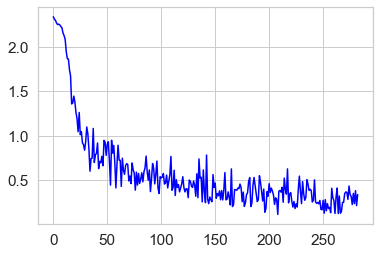

In [33]:
fig = plt.figure()
plt.plot(train_losses, color='blue')
plt.scatter(test_losses, color='red')
# plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
# plt.ylabel('negative log likelihood loss')
fig

In [12]:
# import matplotlib.pyplot as plt

# fig = plt.figure()
# for i in range(1):
#   plt.subplot(2,3,i+1)
#   plt.tight_layout()
#   plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
#   plt.title("Ground Truth: {}".format(example_targets[i]))
#   plt.xticks([])
#   plt.yticks([])
# fig

In [13]:
device = torch.device("cuda") if torch.cuda.is_available else torch.device("cpu")
device

device(type='cuda')

In [14]:
def get_dataloaders(batch_size):
        
    train_loader = torch.utils.data.DataLoader(
        torchvision.datasets.MNIST('/files/', train=True, download=True,
                                   transform=torchvision.transforms.Compose([
                                       torchvision.transforms.ToTensor(),
                                       torchvision.transforms.Normalize(
                                           (0.1307,), (0.3081,))
                                   ])),
        batch_size=batch_size_train, shuffle=True)
    
    test_loader = torch.utils.data.DataLoader(
        torchvision.datasets.MNIST('/files/', train=False, download=True,
                                   transform=torchvision.transforms.Compose([
                                       torchvision.transforms.ToTensor(),
                                       torchvision.transforms.Normalize(
                                           (0.1307,), (0.3081,))
                                   ])),
        batch_size=batch_size_test, shuffle=True)
    
    return train_loader, test_loader
    

In [15]:
def fit(epochs, model, loss_func, opt, train_dl, valid_dl):
    train_losses = []
    val_losses = []
    valid_accuracies = []
    
    #train part
    
    for epoch in range(epochs):
        model.train()
        loss_sum = 0
        for xb, yb in tqdm(train_dl):
            xb, yb = xb.to(device), yb.to(device)
            
            loss = loss_func(model(xb), yb)
            loss_sum += loss.item()
            
            loss.backward()
            opt.step()
            opt.zero_grad()
        train_losses.append(loss_sum/len(train_dl))
        
        model.eval()
        loss_sum = 0
        correct = 0
        num = 0
        
        #test part
        
        with torch.no_grad():
            for xb, yb in tqdm(valid_dl):
                xb, yb = xb.to(device), yb.to(device)
                
                prob = model(xb)
                loss_sum += loss_func(probs, yb).item()
                
                _, preds = torch.max(probs, axis =-1)
                correct +=(preds == yb).sum().item()
                num += len(xb)
                
        val_losses.append(loss_sum/len(valid_dl))
        valid_accuracies.append(correct/num)
        
    return train_losses, val_losses, valid_accuracies


In [16]:
def plot_training(train_losses, valid_losses, valid_accuracies):
    plt.figure(figsize=(12, 9))
    plt.subplot(2, 1, 1)
    plt.xlabel('epoch')
    plt.plot(train_losses, lable='train loss')
    plt.plot(valid_losses, lable='valid loss')
    plt.legend()
    
    plt.subplot(2,1,2)
    plt.xlale('epoch')
    plt.plot(valid_accuracies, lable='valid accuracy')
    plt.legend()

In [17]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
    
        self.hidden1 = nn.Linear(28*28, 500)        
        self.output = nn.Linear(500, 10)
        self.softmax = nn.Softmax(dim=1)
        self.activation = nn.ReLU()
        
    def forward(self, x):
        
        x = self.hidden1(x)
        x = self.activation(x)         
        x = self.output(x) 
        output = self.softmax(x)
        return output        
               

In [18]:
model = Model().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
info = fit(10, model, criterion, optimizer, *get_dataloaders(4))
plot_trainig(*info)

C:\Users\2011-3\AppData\Roaming\Python\Python39\site-packages\torch\cuda\__init__.py:81: UserWarning: 
    Found GPU0 NVIDIA GeForce GTX 650 Ti which is of cuda capability 3.0.
    PyTorch no longer supports this GPU because it is too old.
    The minimum cuda capability that we support is 3.5.
    
  warnings.warn(old_gpu_warn % (d, name, major, capability[1]))


  0%|          | 0/938 [00:00<?, ?it/s]

RuntimeError: mat1 dim 1 must match mat2 dim 0